In [112]:
import gunpowder as gp
import zarr
import matplotlib.pyplot as plt
import os

In [134]:
ZARR_FOLDER = '../../../../data/cells/raw/zarr/'
raw = gp.ArrayKey('raw')
gt = gp.ArrayKey('ground_truth')
files = os.listdir(ZARR_FOLDER)
files = [os.path.join(ZARR_FOLDER,f) for f in files ]
files

['../../../../data/cells/raw/zarr/20072019_ND9_ND11_DIV0-1_Daam1_aTub_Phallo_1_ch_4.zarr',
 '../../../../data/cells/raw/zarr/ND8_DIV0+4h_20x_noConfinment_6_ch_4.zarr']

###  Testing gunpowder pipline 

In [187]:
voxel_size = gp.Coordinate([1,1,1])
input_shape = gp.Coordinate([ 256, 256,4 ])*voxel_size
output_shape = gp.Coordinate([ 256, 256,4])*voxel_size

In [188]:
request = gp.BatchRequest()
request.add(raw,input_shape)
request.add(gt,output_shape)
# request[raw] = gp.Roi((0, 0,0), (240, 240,4))
# request[gt] = gp.Roi((0, 0,0), (240,240,4))

In [200]:
pipeline =( tuple (
    gp.ZarrSource(
    files[t],  # the zarr container
    {raw: 'raw', gt : 'ground_truth'},  # which dataset to associate to the array key
    {raw: gp.ArraySpec(interpolatable=True),
     gt: gp.ArraySpec(interpolatable=True)}  # meta-information
    )
    + gp.RandomLocation()
    
    for t in range(len(files))
)
           + gp.RandomProvider() 
          )

# stack = gp.Stack(5)
# simple_augment = gp.SimpleAugment()

In [202]:
with gp.build(pipeline):
    batch = pipeline.request_batch(request)

In [204]:
batch[raw].data.dtype

dtype('uint8')

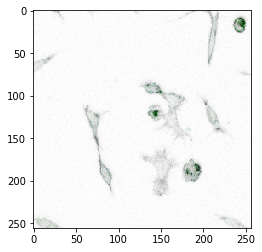

In [205]:
plt.imshow(batch[raw].data)